In [1]:
#import the usual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress scientific notation

pd.options.display.float_format = '{:.2f}'.format

In [3]:
#import data from the dataset
sales_orders = pd.read_excel('Sample - Superstore.xls', sheet_name=0 ,header=0)
sales_returns = pd.read_excel('Sample - Superstore.xls', sheet_name=1 ,header=0)
sales_people = pd.read_excel('Sample - Superstore.xls', sheet_name=2 ,header=0)

In [4]:
sales_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [5]:
sales_returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [6]:
sales_people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [7]:
#shape of data in sales orders sheet
sales_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
#shape of data in sales returns sheet
sales_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [9]:
#shape of data in sales people sheet
sales_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [10]:
#from the dataset info above, all of these sheets are complete without null values

In [11]:
#I want to filter for all sales orders that havent been returned
sales_orders_not_returned = (sales_orders.merge(sales_returns, on=['Order ID'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge','Returned']))
sales_orders_not_returned.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [12]:
sales_orders_not_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9194 non-null   int64         
 1   Order ID       9194 non-null   object        
 2   Order Date     9194 non-null   datetime64[ns]
 3   Ship Date      9194 non-null   datetime64[ns]
 4   Ship Mode      9194 non-null   object        
 5   Customer ID    9194 non-null   object        
 6   Customer Name  9194 non-null   object        
 7   Segment        9194 non-null   object        
 8   Country        9194 non-null   object        
 9   City           9194 non-null   object        
 10  State          9194 non-null   object        
 11  Postal Code    9194 non-null   int64         
 12  Region         9194 non-null   object        
 13  Product ID     9194 non-null   object        
 14  Category       9194 non-null   object        
 15  Sub-Category   9194 n

In [13]:
#I want to filter for all sales orders that have been returned
sales_orders_returned = (sales_orders.merge(sales_returns, on=['Order ID'], how='left', indicator=True).query('_merge == "both"').drop(columns=['_merge','Returned']))
sales_orders_returned.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
18,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.56,2,0.00,2.48
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.20,16.01
20,21,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.20,7.38
55,56,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,6,0.00,52.14
56,57,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,5,0.00,15.55


In [14]:
sales_orders_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 18 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         800 non-null    int64         
 1   Order ID       800 non-null    object        
 2   Order Date     800 non-null    datetime64[ns]
 3   Ship Date      800 non-null    datetime64[ns]
 4   Ship Mode      800 non-null    object        
 5   Customer ID    800 non-null    object        
 6   Customer Name  800 non-null    object        
 7   Segment        800 non-null    object        
 8   Country        800 non-null    object        
 9   City           800 non-null    object        
 10  State          800 non-null    object        
 11  Postal Code    800 non-null    int64         
 12  Region         800 non-null    object        
 13  Product ID     800 non-null    object        
 14  Category       800 non-null    object        
 15  Sub-Category   800 no

In [15]:
#some statistical data on the sales orders not returned
sales_orders_not_returned.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9194.00,9194.00,9194.00,9194.00,9194.00,9194.00
mean,5014.69,53877.04,230.23,3.79,0.16,28.62
std,2879.84,31793.37,623.57,2.22,0.21,228.17
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2523.25,22153.00,16.78,2.00,0.00,1.67
50%,5001.50,53209.00,54.09,3.00,0.20,8.45
75%,7523.75,85705.00,209.70,5.00,0.20,29.25
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


In [16]:
#some statistical data on the sales orders returned
sales_orders_returned.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,4799.99,70283.92,225.63,3.82,0.14,29.04
std,2940.25,31305.39,619.87,2.23,0.20,295.52
min,19.00,1852.00,1.68,1.00,0.00,-3701.89
25%,2114.75,43229.00,20.68,2.00,0.00,2.94
50%,4929.50,90008.00,59.97,3.00,0.00,10.79
75%,7162.75,94109.00,217.98,5.00,0.20,30.61
max,9993.00,99207.00,13999.96,14.00,0.80,6719.98


In [17]:
#finding the unique value counts for other categorical data in sales orders not returned
for col in sales_orders_not_returned.columns:
    print(sales_orders_not_returned[col].value_counts())

2047    1
1330    1
5440    1
9534    1
3387    1
       ..
4791    1
8889    1
2748    1
701     1
2049    1
Name: Row ID, Length: 9194, dtype: int64
CA-2017-157987    12
US-2016-108504    11
CA-2015-131338    10
CA-2016-105732    10
US-2015-126977    10
                  ..
CA-2017-113075     1
US-2016-128293     1
CA-2016-163216     1
CA-2014-132612     1
CA-2015-108672     1
Name: Order ID, Length: 4713, dtype: int64
2016-11-10    35
2016-09-05    34
2017-09-02    33
2017-12-09    33
2017-12-02    31
              ..
2015-04-12     1
2016-06-19     1
2017-01-06     1
2016-10-25     1
2014-08-11     1
Name: Order Date, Length: 1221, dtype: int64
2017-11-21    32
2017-09-06    30
2017-09-15    30
2015-12-16    29
2017-12-12    29
              ..
2014-04-21     1
2016-03-04     1
2015-11-22     1
2014-06-17     1
2017-01-10     1
Name: Ship Date, Length: 1317, dtype: int64
Standard Class    5518
Second Class      1811
First Class       1386
Same Day           479
Name: Ship Mode, dty

In [18]:
#finding the unique value counts for other categorical data in sales orders returned
for col in sales_orders_returned.columns:
    print(sales_orders_returned[col].value_counts())

224     1
5708    1
778     1
8965    1
8964    1
       ..
5448    1
5447    1
7490    1
9237    1
1377    1
Name: Row ID, Length: 800, dtype: int64
CA-2017-100111    14
CA-2016-165330    11
CA-2015-164882     9
CA-2017-161956     8
CA-2014-142769     8
                  ..
CA-2017-142888     1
CA-2017-152660     1
CA-2017-129707     1
CA-2017-140053     1
CA-2017-159954     1
Name: Order ID, Length: 296, dtype: int64
2017-09-20    14
2016-12-11    14
2016-09-02    12
2016-12-18    10
2017-08-27     9
              ..
2014-12-03     1
2017-06-29     1
2016-12-24     1
2016-11-27     1
2014-10-31     1
Name: Order Date, Length: 259, dtype: int64
2016-09-06    15
2017-09-26    14
2016-12-11    11
2017-09-13    10
2017-06-20    10
              ..
2014-09-05     1
2016-11-29     1
2014-12-20     1
2016-10-22     1
2015-10-27     1
Name: Ship Date, Length: 262, dtype: int64
Standard Class    450
First Class       152
Second Class      134
Same Day           64
Name: Ship Mode, dtype: int6

c:\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


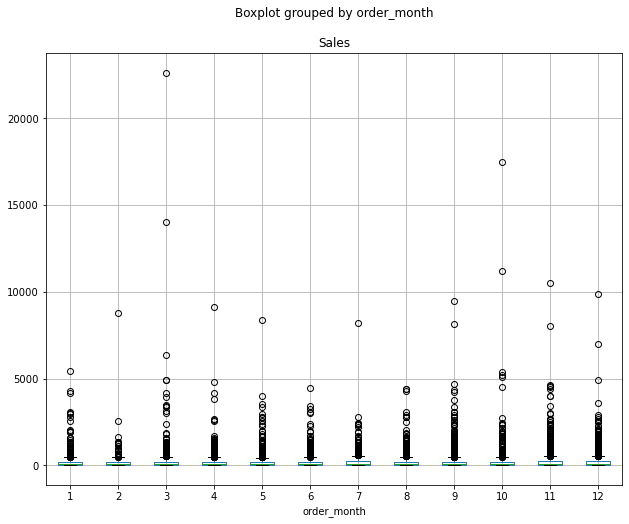

In [19]:
# Create features for month and year for the sales orders dataset
sales_orders['order_month'] = sales_orders['Order Date'].dt.month
sales_orders['order_year'] = sales_orders['Order Date'].dt.year

#box plot for sales per order month for sales order dataset
sales_orders.boxplot(column='Sales', by='order_month', figsize=(10, 8))

c:\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


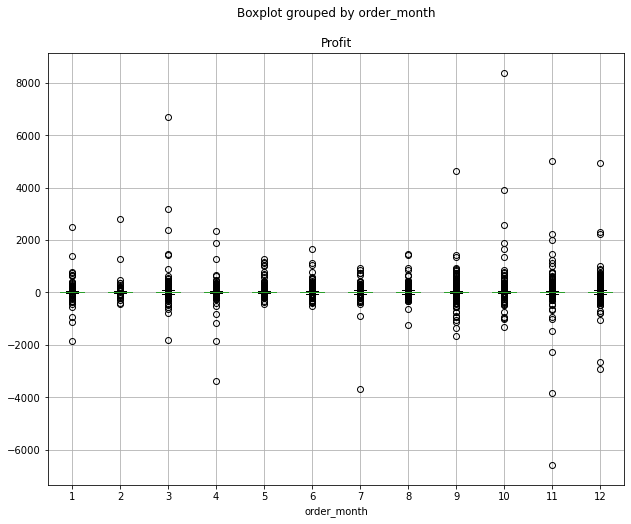

In [20]:
#box plot for profit per order month for sales order dataset
sales_orders.boxplot(column='Profit', by='order_month', figsize=(10, 8))

c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programs\python\python37\lib\site-packages\pandas\plo

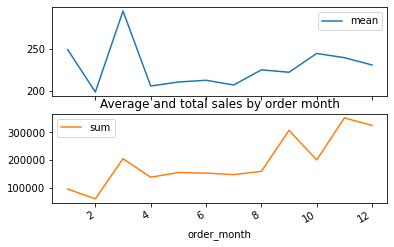

In [21]:
#Plot both the mean and the sum of the total sales per order month
grouped_sales = sales_orders.groupby(['order_month'])['Sales'].agg([np.mean, np.sum]).reset_index()
grouped_sales.plot(x='order_month', subplots=True)
plt.title('Average and total sales by order month')
plt.show()

c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programs\python\python37\lib\site-packages\pandas\plo

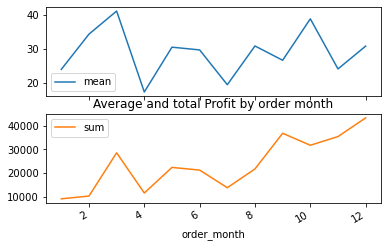

In [22]:
#Plot both the mean and the sum of the total sales per order month
grouped_profit = sales_orders.groupby(['order_month'])['Profit'].agg([np.mean, np.sum]).reset_index()
grouped_profit.plot(x='order_month', subplots=True)
plt.title('Average and total Profit by order month')
plt.show()

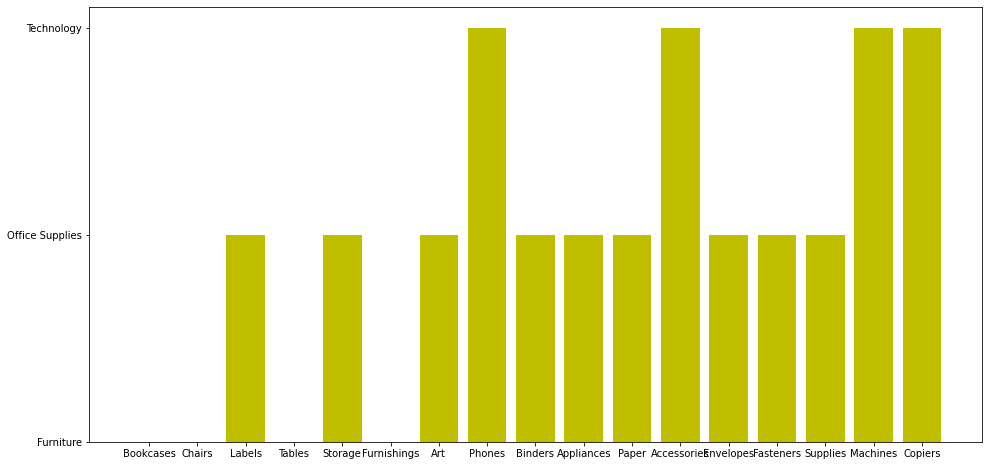

In [23]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=sales_orders,color='y')
plt.show()

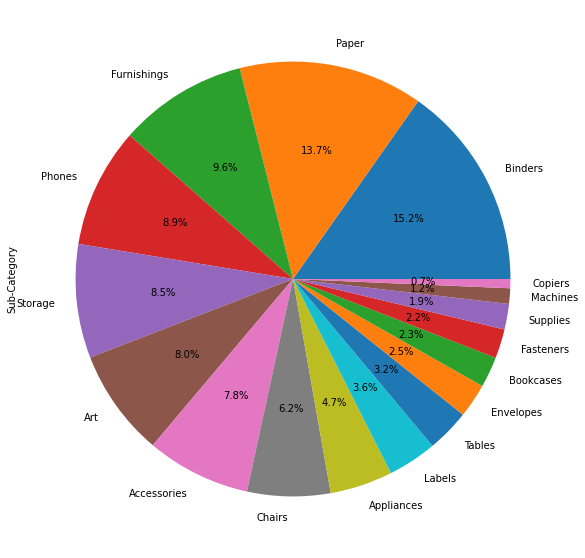

In [24]:
plt.figure(figsize=(12,10))
sales_orders['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

c:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


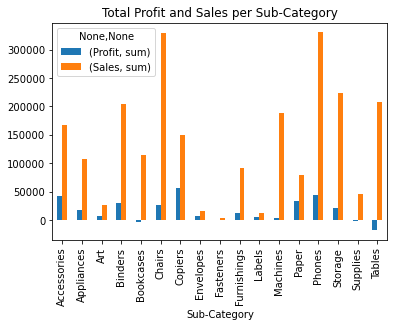

In [25]:
sales_orders.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

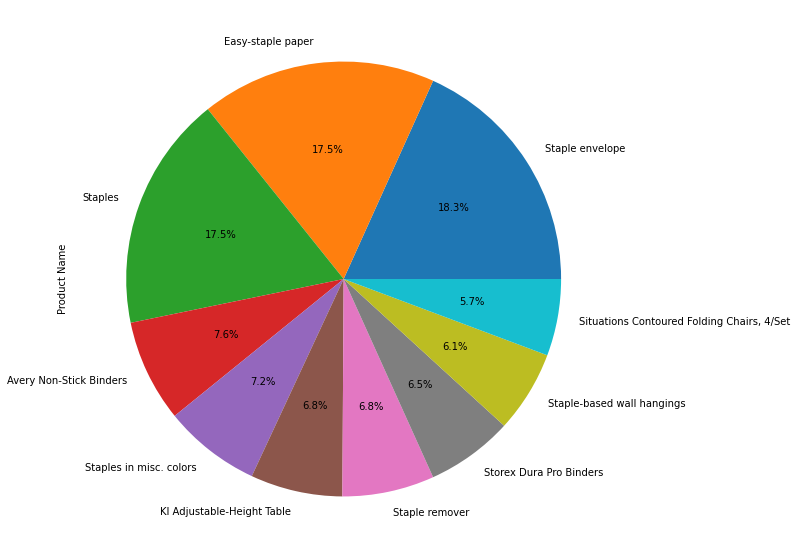

In [26]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
sales_orders['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

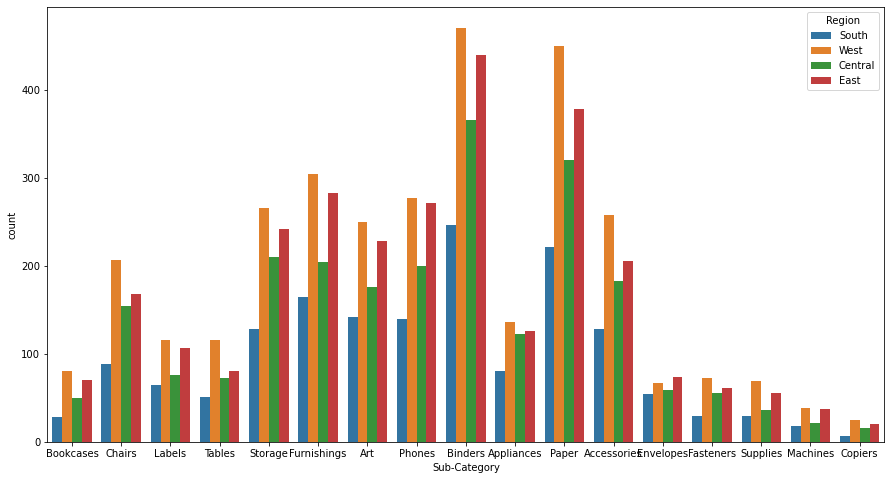

In [27]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=sales_orders)
plt.show()

In [28]:
#To understand the data better. Lets create some new columns like Cost, Profit% for the sales_orders dataset
sales_orders['Cost']=sales_orders['Sales']-sales_orders['Profit']
sales_orders['Cost'].head()

0    220.05
1    512.36
2      7.75
3   1340.61
4     19.85
Name: Cost, dtype: float64

In [29]:
sales_orders['Profit %']=(sales_orders['Profit']/sales_orders['Cost'])*100

In [30]:
#Products with high Profit Percentage 
sales_orders.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,Cost,Profit %
1696,1697,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,United States,Bayonne,...,Phones,netTALK DUO VoIP Telephone Service,104.98,2,0.00,52.49,9,2015,52.49,100.00
4611,4612,CA-2016-109407,2016-01-24,2016-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,United States,Gulfport,...,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.36,4,0.00,15.68,1,2016,15.68,100.00
3984,3985,CA-2016-135265,2016-07-07,2016-07-09,Second Class,CC-12370,Christopher Conant,Consumer,United States,Los Angeles,...,Paper,Xerox 1942,48.94,1,0.00,24.47,7,2016,24.47,100.00
4651,4652,CA-2017-150987,2017-04-08,2017-04-12,Standard Class,AH-10120,Adrian Hane,Home Office,United States,San Francisco,...,Paper,Xerox 1942,195.76,4,0.00,97.88,4,2017,97.88,100.00
6600,6601,CA-2014-154095,2014-12-02,2014-12-07,Standard Class,ON-18715,Odella Nelson,Corporate,United States,Clinton,...,Paper,Xerox 1942,146.82,3,0.00,73.41,12,2014,73.41,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,8917,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,Austin,...,Appliances,Euro Pro Shark Stick Mini Vacuum,48.78,4,0.80,-131.72,5,2016,180.50,-72.97
8766,8767,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Fort Worth,...,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.59,3,0.80,-67.62,11,2015,92.21,-73.33
676,677,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,...,Appliances,Hoover Portapower Portable Vacuum,2.69,3,0.80,-7.39,3,2017,10.08,-73.33
261,262,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,United States,Pasadena,...,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.62,2,0.80,-4.47,6,2017,6.09,-73.33


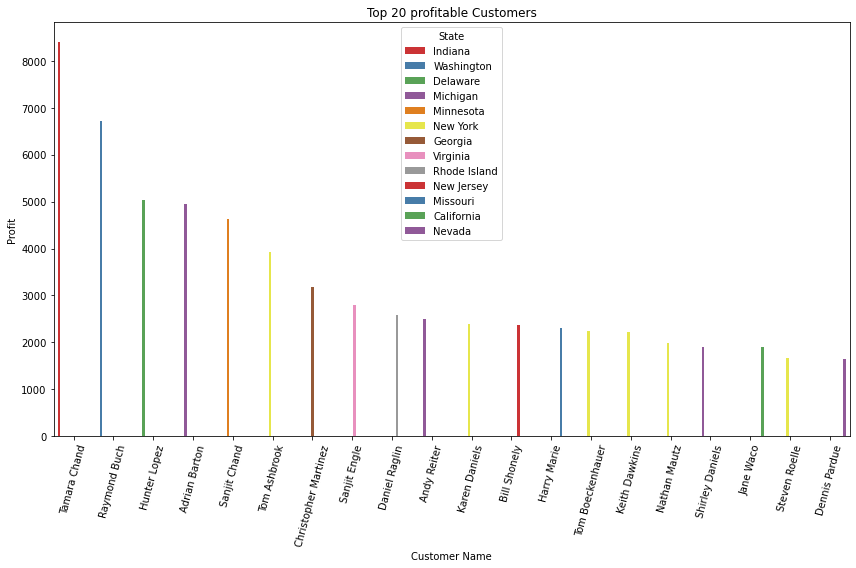

In [31]:
#Top 20 Customers who benefitted the store
sortedTop20 = sales_orders.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [32]:
#Lets find out some more details about each Customer like total products purchased,Products they purchase,First Purchase Date,Last Purchase Date,Location from where the Customer placed an order.

#creating function and appending customer and order info to it.
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

#grouping based on Customer ID and applying the function we created above
df_agg = sales_orders.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.56,44.53,2014-03-31,2017-06-29,"[Belkin 325VA UPS Surge Protector, 6', Avery B...","[Minneapolis, San Francisco, Round Rock, New Y..."
AA-10375,15,1056.39,52.35,2014-04-21,2017-12-11,"[Sterilite Officeware Hinged File Box, Colored...","[Mesa, Omaha, Los Angeles, Salem, Atlanta, Ran..."
AA-10480,12,1790.51,55.58,2014-05-04,2017-04-15,"[Xerox 1967, DAX Wood Document Frame, Strathmo...","[Concord, Middletown, Springfield, Detroit]"
AA-10645,18,5086.93,42.36,2014-06-22,2017-11-05,"[Padded Folding Chairs, Black, 4/Carton, Panas...","[Chester, San Francisco, Georgetown, San Diego..."
AB-10015,6,886.16,15.19,2014-02-18,2016-11-10,"[Global Push Button Manager's Chair, Indigo, N...","[Seattle, Arlington, Oklahoma City]"
...,...,...,...,...,...,...,...
XP-21865,28,2374.66,53.80,2014-01-20,2017-11-17,[Imation USB 2.0 Swivel Flash Drive USB flash ...,"[San Diego, Everett, Chicago, Los Angeles, Pas..."
YC-21895,8,5454.35,42.24,2014-11-17,2017-12-26,[Hewlett Packard 610 Color Digital Copier / Pr...,"[San Francisco, Los Angeles, Newark, Dallas, F..."
YS-21880,12,6720.44,37.28,2015-01-12,2017-12-21,"[4009 Highlighters by Sanford, Letter Size Car...","[Burlington, Oakland, Newark, Seattle, Columbu..."


Text(0.5, 1.0, 'Profit level per different level of Discounts')

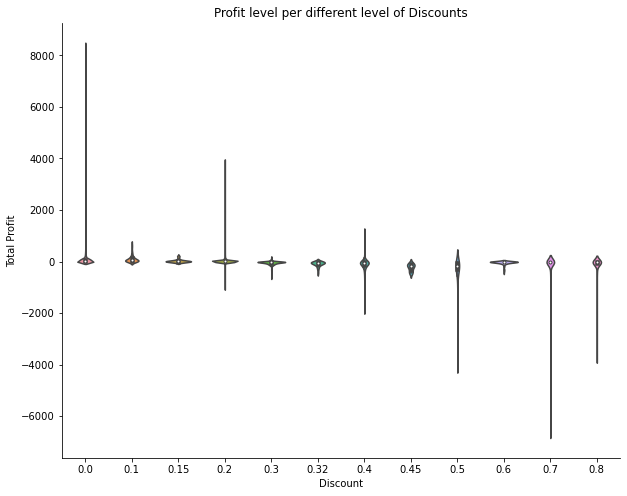

In [33]:
#Relationship of Discount and Profit
plt.figure(figsize=(10,8))
fig_violin = sns.violinplot(data = sales_orders,
                          x = 'Discount', y = 'Profit',
                          width = 0.6,
                          orient = 'v')
fig_violin.set_ylabel('Total Profit')
sns.despine()
plt.title('Profit level per different level of Discounts')

In [34]:
#From the diagram, the effect of increasing discount percent on profitability is not clear, due to the mean level stays flat with fluctation on the outlier amount. However, the outliers state that the higher discount level from 0.4 onward, the less profit the store made.

Text(0.5, 1.0, 'Sales level per different level of Discounts')

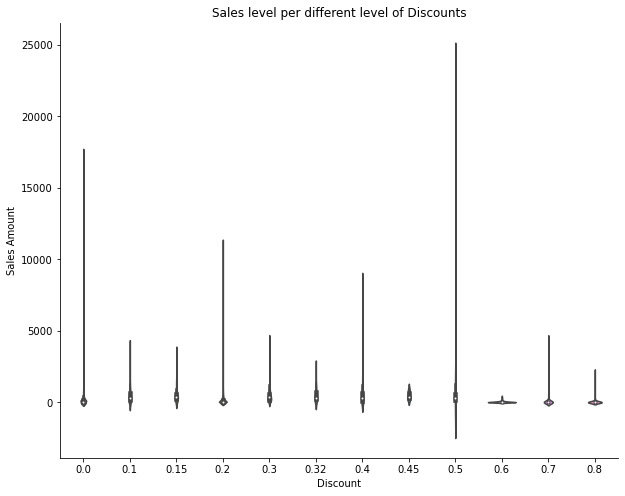

In [35]:
#Relationship of Discount and Sales
plt.figure(figsize=(10,8))
fig_violin = sns.violinplot(data = sales_orders,
                          x = 'Discount', y = 'Sales',
                          width = 0.6,
                          orient = 'v')
fig_violin.set_ylabel('Sales Amount')
sns.despine()
plt.title('Sales level per different level of Discounts')

In [36]:
#Observing from the chart above, we have same conclusion that discount doesnt have clear effect on sales amount, dispite there are extreme outliers for sales at 0.5 discount.

In [37]:
#Relationship between sales and profit per sub-category
subcategorySalesAndProfit = sales_orders.groupby("Sub-Category").agg({"Sales":np.sum, "Profit": np.sum})
subcategorySalesAndProfit

,Sales,Profit
Sub-Category,,
Accessories,167380.32,41936.64
Appliances,107532.16,18138.01
Art,27118.79,6527.79
Binders,203412.73,30221.76
Bookcases,114880.00,-3472.56
Chairs,328449.10,26590.17
Copiers,149528.03,55617.82
Envelopes,16476.40,6964.18
Fasteners,3024.28,949.52


c:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


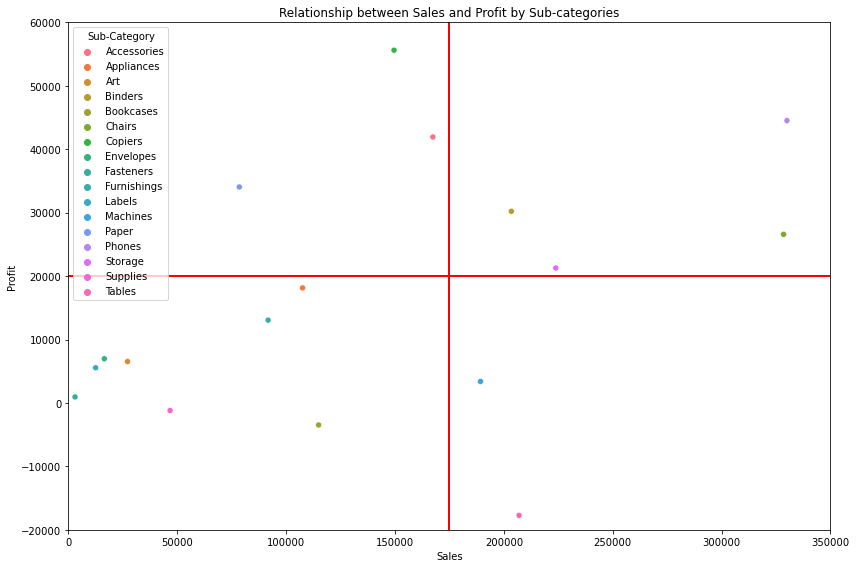

In [39]:
#plotting the relationship -- use scatter plot
fig = plt.figure(figsize=(12,8))
# Set x-axis range
plt.xlim((0,350000))
# Set y-axis range
plt.ylim((-20000,60000))
# Draw lines to split quadrants
plt.plot([175000,175000],[-20000,60000], linewidth=2, color='red' )
plt.plot([0,350000],[20000,20000], linewidth=2, color='red' )
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=subcategorySalesAndProfit.index, data=subcategorySalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Sub-categories")
plt.tight_layout()
plt.show()

In [40]:
#If applying the same notion from marketing to interpret this graph, we would categorize from the top-left quadrant on clockwise order into the following groups: Question marks (lower than average sales, higher than average profits), Rising stars, Cash cows and finally Dogs (i.e. sub-categories that the store need to consider exit from selling)

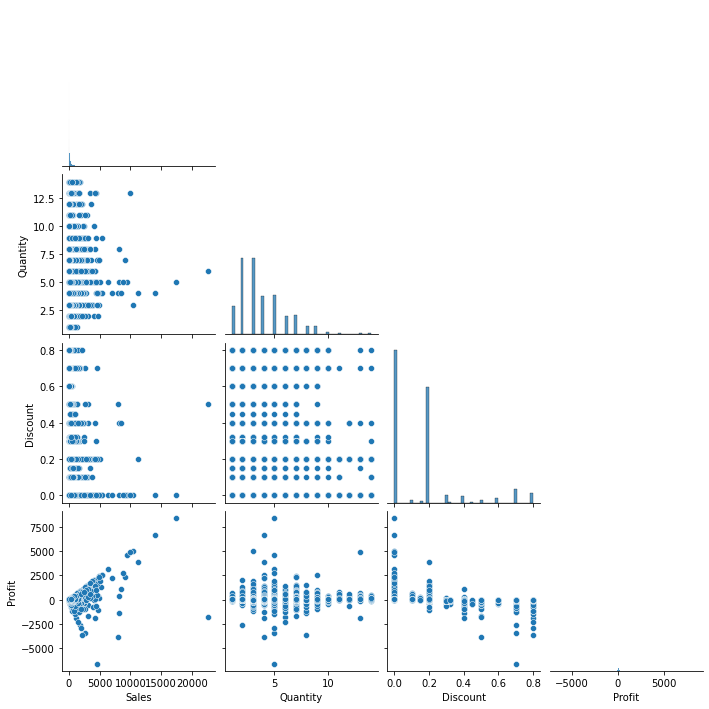

In [41]:
# Pairwise relationship
pp = sns.pairplot(sales_orders, 
                  corner=True,
                  vars = ['Sales',
                          'Quantity',
                          'Discount',
                          'Profit'])

In [ ]:
"""
Interpretation of the graphs above for relationships among different pairs:
We can observe four meaningful relationships among the four factors for this store particularly:
1) Relationship between Quantity and Sales:
   After normalization, we can see that data points are distributed into the usual normal distribution with a left skew where the most sales are realized at quantity lower than the median point of 7.5
2) Relationship between Discount and Sales:
   This distribution resembles a log graph where surprisingly there are more sales at none or low discount rate of below 0.4
3) Relationship between Quantity and Profit:
   After normalization and taken absolute range for profit, we can see that data points are also distributed into the usual normal distribution with a left skew where most data points resides at quantity lower than the median point of 7.5. However, we also see that a lot of sales are losses.
4) Relationship between Discount and Profit:
   Here we see a better visibility of the downward trend when the level of discount rate increaing having impact on the profitability than the violin plot above. Hence, the store needs to take care not to sales at losses at discount rate from 0.4 and upwards.
"""